In [1]:
# Load libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB # Import GaussianClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier#import KNN
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics for evaluation metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix #to get access to confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display
import matplotlib.pyplot as plt
#define column names
col_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)
#take a peek to see if this looks right
data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#split dataset in features and target variable
feature_cols = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
'bmi', 'diabetes_pedigree_function', 'age']
X = data[feature_cols] # Features
y = data.outcome # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

# Bayesian Classifier

In [3]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train model using the training sets
gnb.fit(X_train, y_train)
#predict the response for test dataset
y_predNB = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.7835497835497836


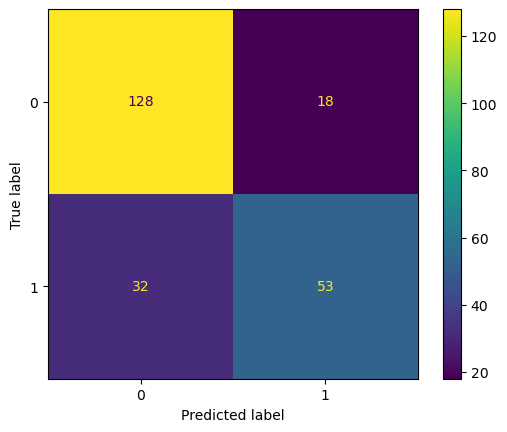

In [4]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predNB)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [5]:
#Look at the other results
print(metrics.classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [6]:
#To calculate sensitivity and specificity for each class,
#we need to calculate the true positive rate (TPR) and true negative rate (TNR) for each class.
#The TPR for a class is the proportion of true positives among the actual positives for that class.
# The TNR for a class is the proportion of true negatives among the actual negatives for that class.
n_classes = conf_mat.shape[0]
for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.88, TNR = 0.62
Class 1: TPR = 0.62, TNR = 0.88


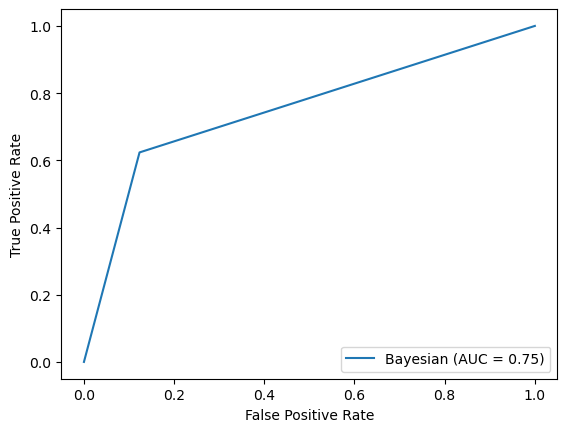

In [7]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predNB)
roc_auc = metrics.auc(fpr, tpr)
roc_displayNB = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
estimator_name='Bayesian')
roc_displayNB.plot()
plt.show()

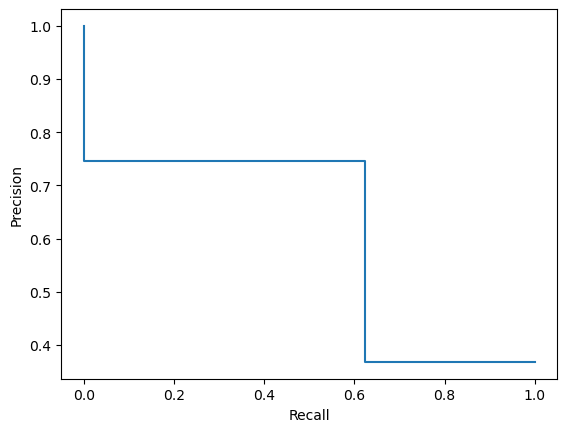

In [8]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y_test, y_predNB)
pr_displayNB = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayNB.plot()
plt.show()

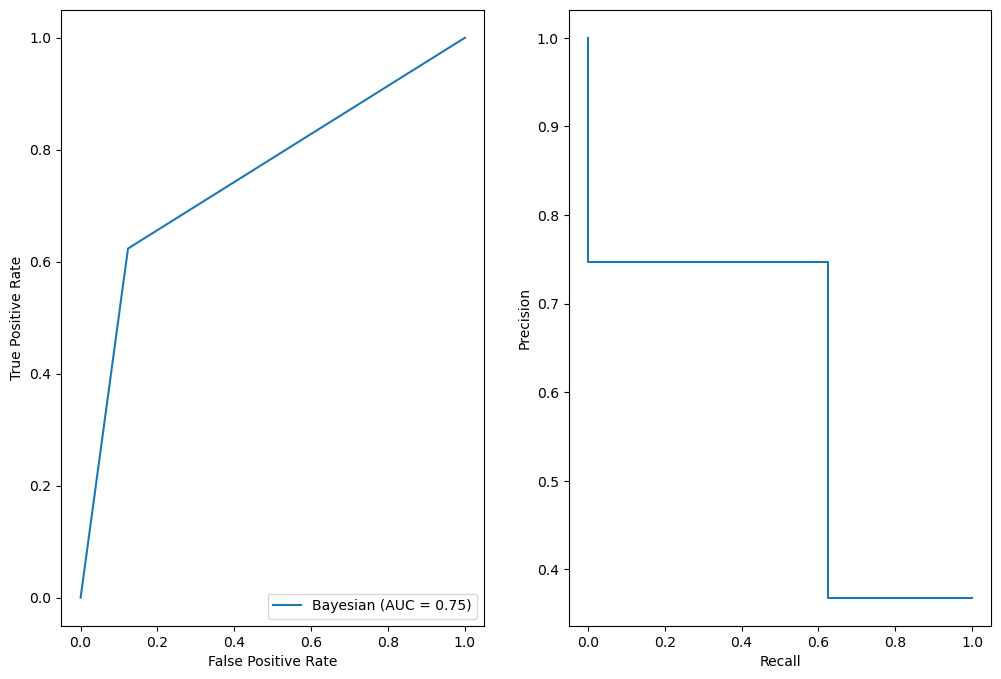

In [9]:
#See them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_displayNB.plot(ax=ax1)
pr_displayNB.plot(ax=ax2)
plt.show()

# Questions Page 7
<p>1. Each of the different metrics show that the model is classifying positives pretty badly and then classifying negatives a little better than the positives. </p>
<p>2. This model classifies negatives nearly 20% better than positive examples. This shows to me that there could either be not enough positive examples or the model is just classifying totally wrong. </p>

# DTree

In [10]:
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_predDT = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_predDT)}")

Accuracy: 0.696969696969697


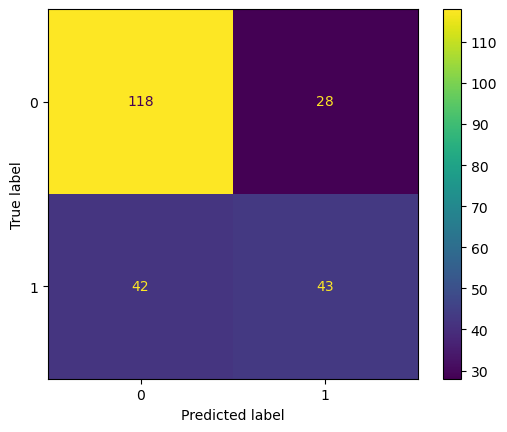

In [11]:
conf_mat = confusion_matrix(y_test, y_predDT)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [15]:
#evaluation metrics
print(metrics.classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       146
           1       0.61      0.51      0.55        85

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231



In [14]:
# looking at sensitivity and specificity
n_classes = conf_mat.shape[0]
for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.81, TNR = 0.51
Class 1: TPR = 0.51, TNR = 0.81


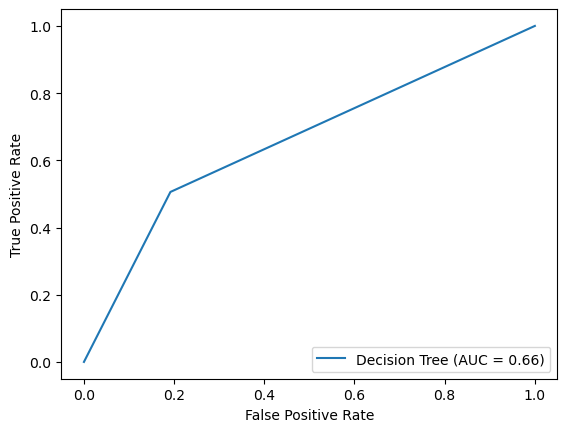

In [16]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predDT)
roc_auc = metrics.auc(fpr, tpr)
roc_displayDT = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
estimator_name='Decision Tree')
roc_displayDT.plot()
plt.show()

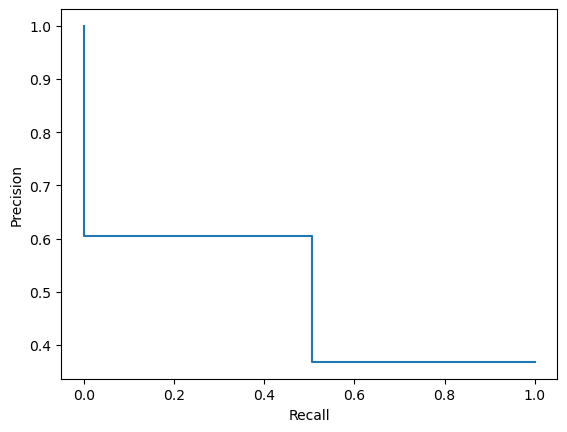

In [17]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y_test, y_predDT)
pr_displayDT = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayDT.plot()
plt.show()

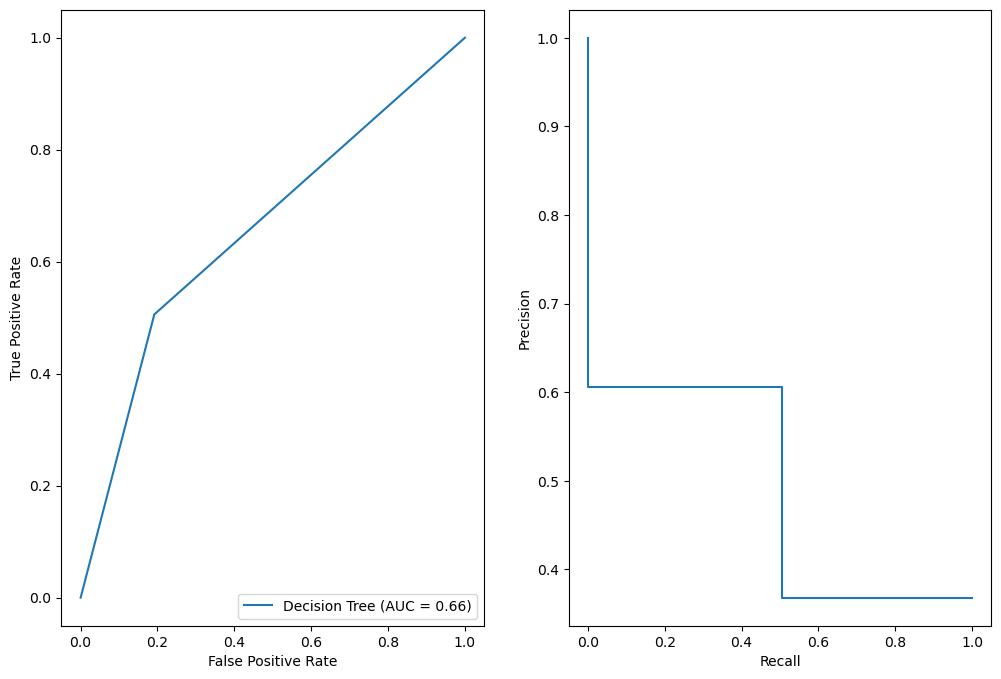

In [19]:
#See them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_displayDT.plot(ax=ax1)
pr_displayDT.plot(ax=ax2)
plt.show()

# Questions Page 12
<p>1. Each of the different metrics show that the model is classifying positives terribly, since it's classifying negatives over 20% better overall with the f-1 score, and the chance that it is getting a positive correct is hardly better than flipping a coin. The highest part is the recall of the negatives, which in the case of this data is not as important as actually getting the diagnosis correct. </p>
<p>2. Yes, it has a 3/4 chance of properly classifying a negative, where a coin flip could do nearly the same for classifying positives. Positive classification struggles with this data which is not good for a diabetes classifier. </p>

# KNN

In [21]:
#Fix data for KNN
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(data.drop('outcome', axis=1))
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(data.drop('outcome',axis=1))
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])
#split dataset in features and target variable
X = data_feat
y = data['outcome'] # Target variable
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3,
random_state=1) # 70% training and 30% test
eucKNN = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
eucKNN.fit(X2_train,y2_train)
y_predKNN = eucKNN.predict(X2_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_predKNN))

Accuracy: 0.8008658008658008


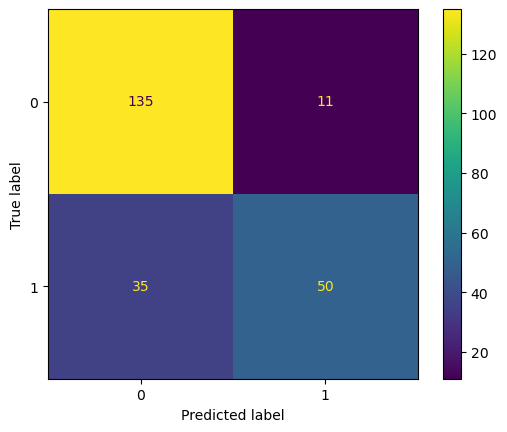

In [22]:
conf_mat = confusion_matrix(y2_test, y_predKNN)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [23]:
#evaluation metrics
print(metrics.classification_report(y2_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.82      0.59      0.68        85

    accuracy                           0.80       231
   macro avg       0.81      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



In [25]:
#To calculate sensitivity and specificity for each class,
#we need to calculate the true positive rate (TPR) and true negative rate (TNR) for eachclass.
#The TPR for a class is the proportion of true positives among the actual positives forthat class.
# The TNR for a class is the proportion of true negatives among the actual negatives forthat class.
n_classes = conf_mat.shape[0]
for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.92, TNR = 0.59
Class 1: TPR = 0.59, TNR = 0.92


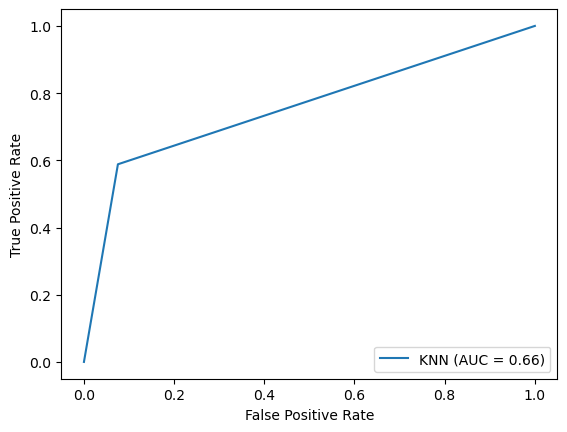

In [26]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y2_test,y_predKNN)
roc_displayKNN = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='KNN')
roc_displayKNN.plot()
plt.show()

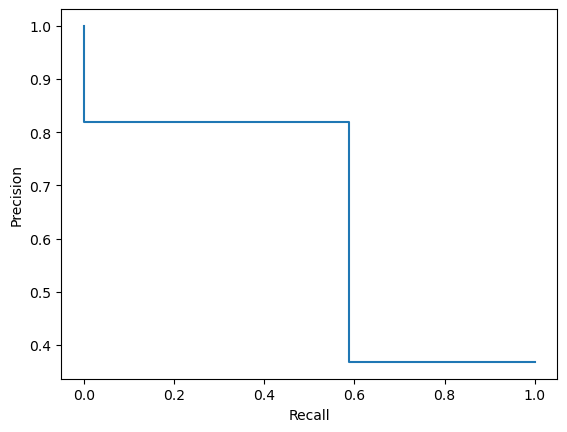

In [27]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y2_test, y_predKNN)
pr_displayKNN = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayKNN.plot()
plt.show()

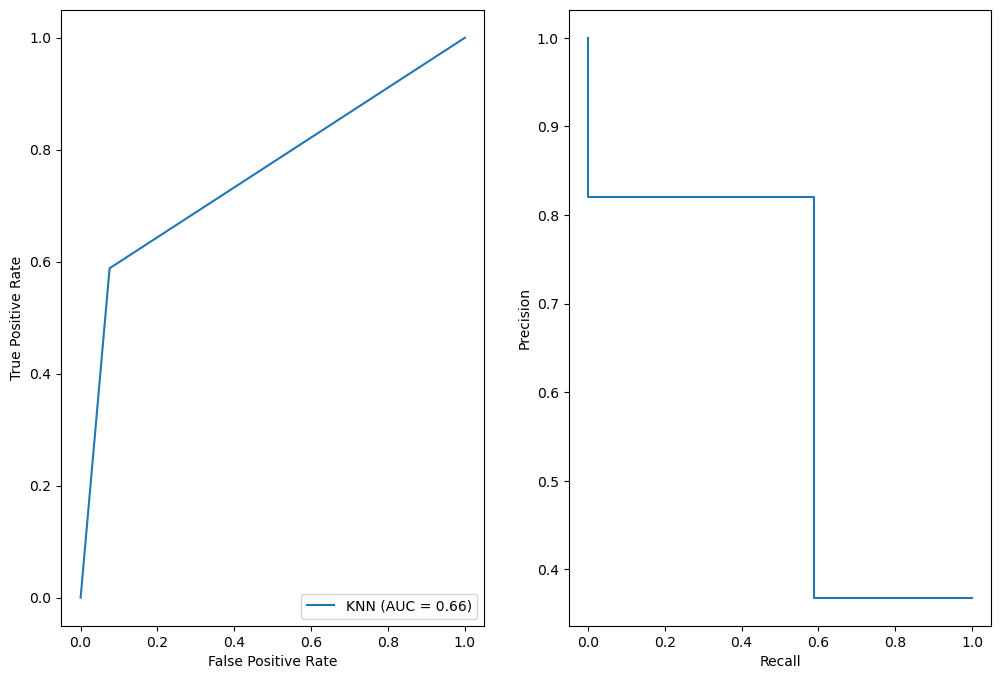

In [28]:
#See them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_displayKNN.plot(ax=ax1)
pr_displayKNN.plot(ax=ax2)
plt.show()

# Questions Page 17
<p>1. This model does fairly similar to the first model, it has a really high rate of classifying negatives correct, but it does not do a good job classifying positives correct. This is bad due to the high recall in positives since we don't want to misclassify a real diabetic due to the high chance of future issues. The f-1 scores tell the same thing, that the accuracy for negatives is alright, but the positives is only a bit better than random still. </p>
<p>2. Yes, as mentioned in the previous answer, positives are still being classified over 20% less overall that the negavites are, and this is not great for this kind of diagnosis. </p>
<p>3. In these 3 I've tried, I think that Bayesian does the best. The decision tree isn't even in this contest it performed so poorly, but the other two maintained similar stats. The f1 scores of each were nearly the same, however, my decision is based of the correctness of the positive diagnosis. Bayesian outperformed KNN by a few percentage points when classifying positives correctly, which is why I am choosing it. In this case of a medical diagnosis, it is important to have a system that is able to classify positives at a high percentage. None of the have a high percentage, but Bayesian outperformed KNN in this regard </p>

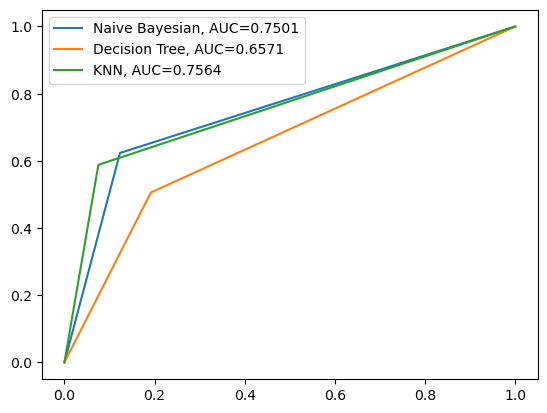

In [29]:
plt.figure()
fpr, tpr, _ = metrics.roc_curve(y_test, y_predNB)
auc = round(metrics.roc_auc_score(y_test, y_predNB), 4)
plt.plot(fpr,tpr,label="Naive Bayesian, AUC="+str(auc))
fpr, tpr, _ = metrics.roc_curve(y_test, y_predDT)
auc = round(metrics.roc_auc_score(y_test, y_predDT), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))
fpr, tpr, _ = metrics.roc_curve(y_test, y_predKNN)
auc = round(metrics.roc_auc_score(y_test, y_predKNN), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))
#add legend
plt.legend()
plt.show()

# PERSONAL DATA: Computer Virus Detection

In [40]:
# Load libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # Import RandomForest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#make sure you have your labels correct
#some files have this in the file - others it is in the description
col_names = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute',
                'Label']
# load dataset
data = pd.read_csv("TUANDROMD.csv", header=None, names=col_names, low_memory=False)
#take a peek to see if this looks right
data.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#split dataset in features and target variable
feature_cols = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute']

X = data[feature_cols] # Features
y = data.Label # Target variable - notice - you need to spell the column name for the target correctly for this to work
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

# Bayesian

In [42]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train model using the training sets
gnb.fit(X_train, y_train)
#predict the response for test dataset
y_predNB = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.2380597014925373


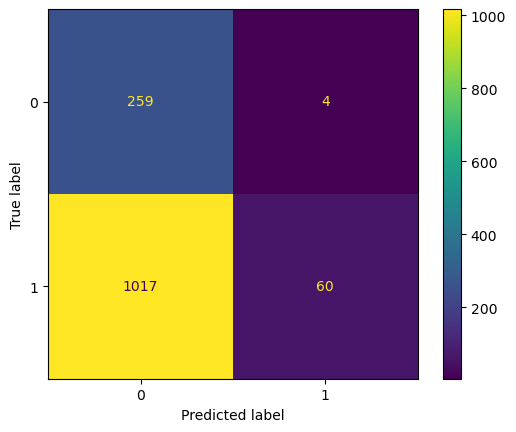

In [43]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predNB)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [44]:
#Look at the other results
print(metrics.classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.20      0.98      0.34       263
           1       0.94      0.06      0.11      1077

    accuracy                           0.24      1340
   macro avg       0.57      0.52      0.22      1340
weighted avg       0.79      0.24      0.15      1340



In [45]:
#To calculate sensitivity and specificity for each class,
#we need to calculate the true positive rate (TPR) and true negative rate (TNR) for each class.
#The TPR for a class is the proportion of true positives among the actual positives for that class.
# The TNR for a class is the proportion of true negatives among the actual negatives for that class.
n_classes = conf_mat.shape[0]
for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.98, TNR = 0.06
Class 1: TPR = 0.06, TNR = 0.98


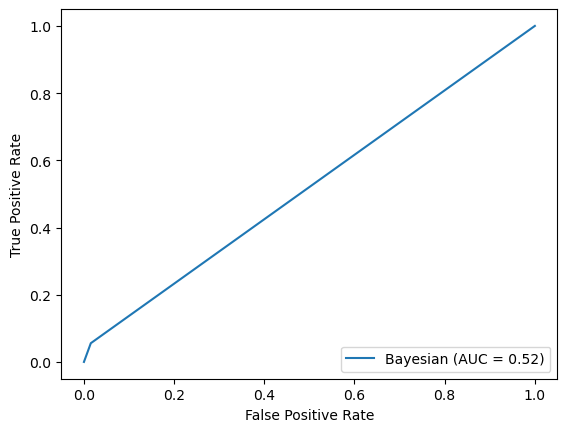

In [46]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predNB)
roc_auc = metrics.auc(fpr, tpr)
roc_displayNB = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
estimator_name='Bayesian')
roc_displayNB.plot()
plt.show()

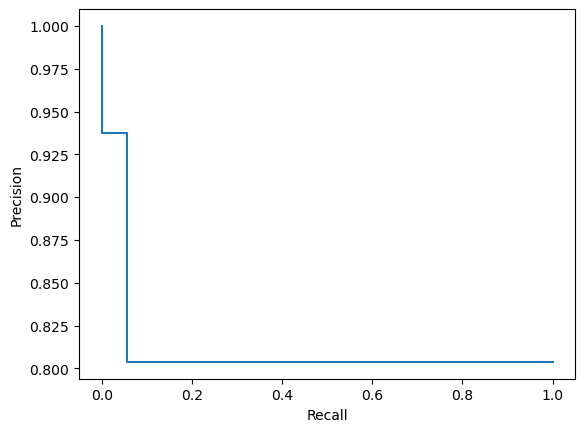

In [47]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y_test, y_predNB)
pr_displayNB = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayNB.plot()
plt.show()

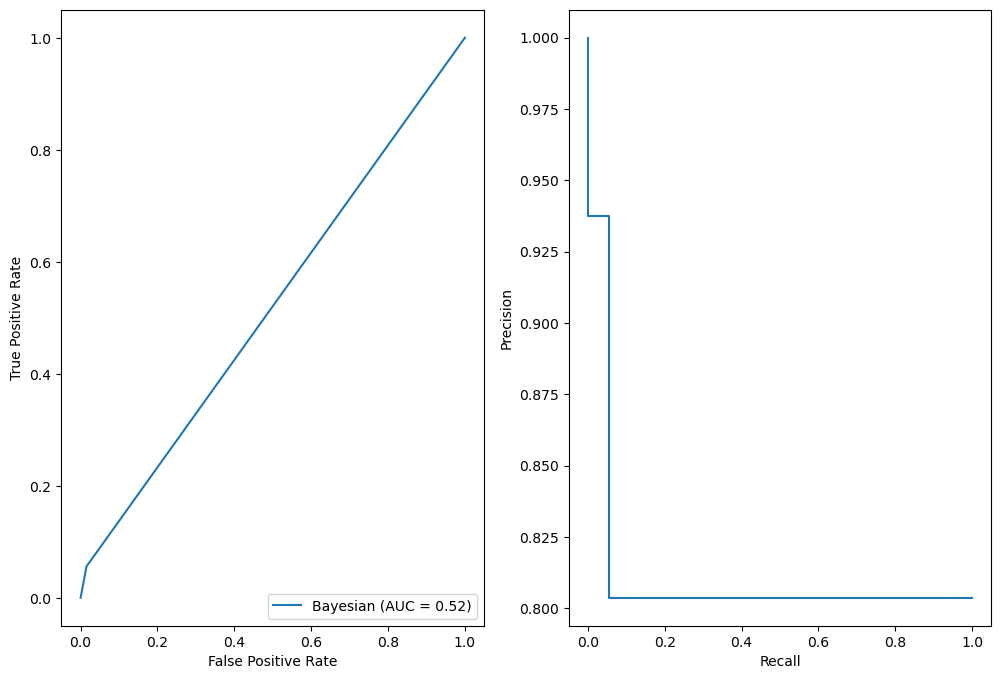

In [48]:
#See them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_displayNB.plot(ax=ax1)
pr_displayNB.plot(ax=ax2)
plt.show()

# DTree

In [49]:
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_predDT = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_predDT)}")

Accuracy: 0.9873134328358208


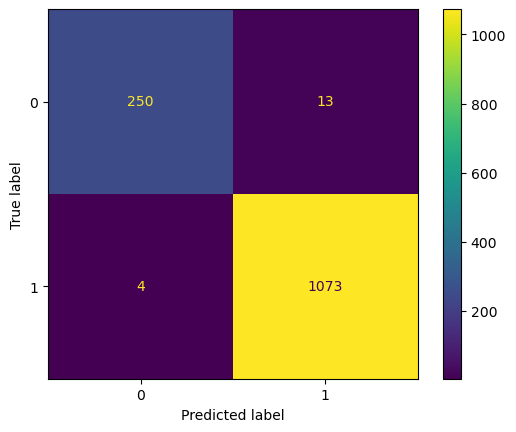

In [50]:
conf_mat = confusion_matrix(y_test, y_predDT)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [51]:
#evaluation metrics
print(metrics.classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       263
           1       0.99      1.00      0.99      1077

    accuracy                           0.99      1340
   macro avg       0.99      0.97      0.98      1340
weighted avg       0.99      0.99      0.99      1340



In [52]:
# looking at sensitivity and specificity
n_classes = conf_mat.shape[0]
for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.95, TNR = 1.00
Class 1: TPR = 1.00, TNR = 0.95


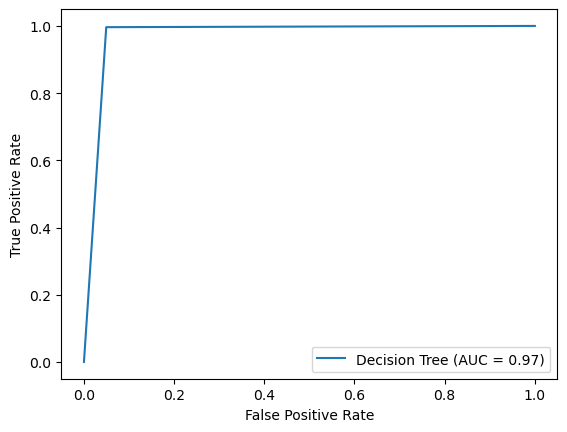

In [53]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predDT)
roc_auc = metrics.auc(fpr, tpr)
roc_displayDT = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
estimator_name='Decision Tree')
roc_displayDT.plot()
plt.show()

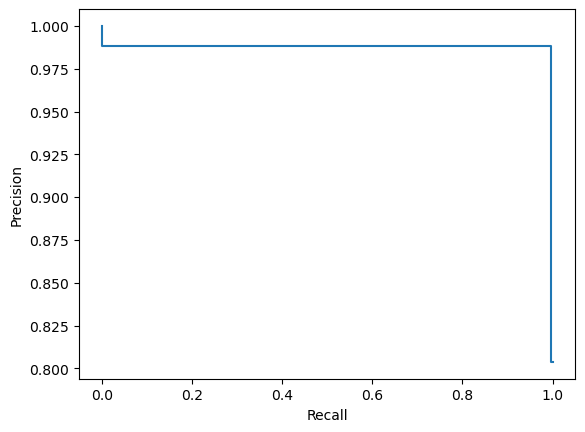

In [54]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y_test, y_predDT)
pr_displayDT = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayDT.plot()
plt.show()

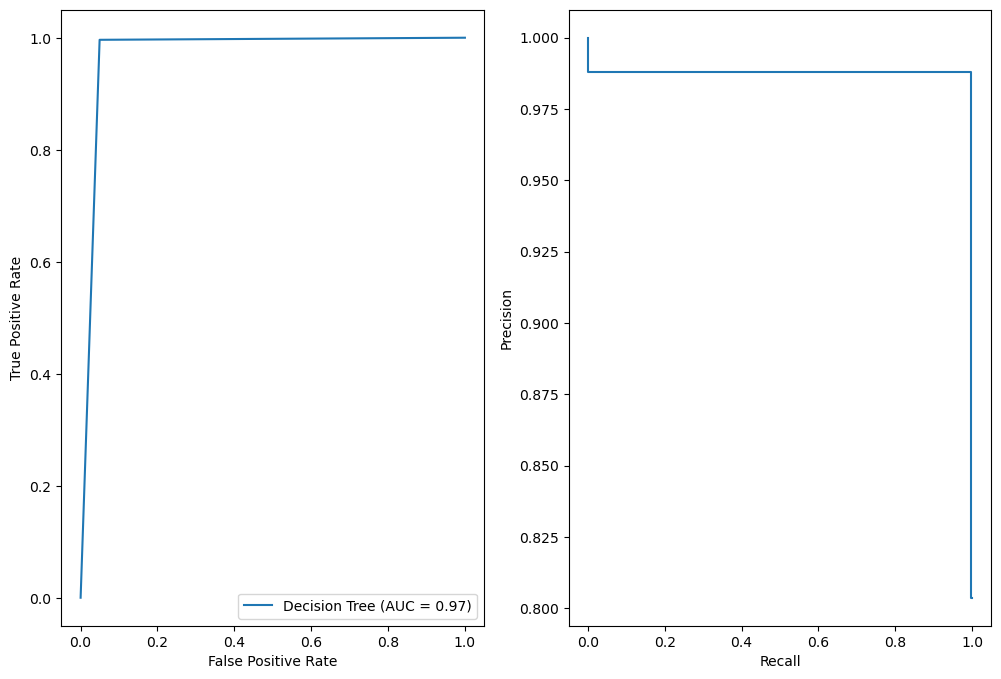

In [55]:
#See them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_displayDT.plot(ax=ax1)
pr_displayDT.plot(ax=ax2)
plt.show()

# KNN

In [59]:
#Fix data for KNN
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(data.drop('Label', axis=1))
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(data.drop('Label',axis=1))
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])
#split dataset in features and target variable
X = data_feat
y = data['Label'] # Target variable
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3,
random_state=1) # 70% training and 30% test
eucKNN = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
eucKNN.fit(X2_train,y2_train)
y_predKNN = eucKNN.predict(X2_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_predKNN))

Accuracy: 0.9746268656716418


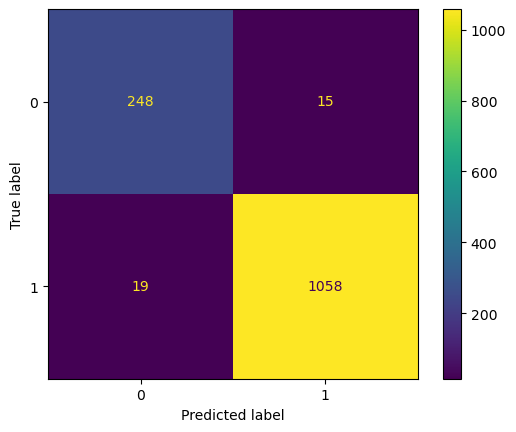

In [60]:
conf_mat = confusion_matrix(y2_test, y_predKNN)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [61]:
#evaluation metrics
print(metrics.classification_report(y2_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       263
           1       0.99      0.98      0.98      1077

    accuracy                           0.97      1340
   macro avg       0.96      0.96      0.96      1340
weighted avg       0.97      0.97      0.97      1340



In [62]:
#To calculate sensitivity and specificity for each class,
#we need to calculate the true positive rate (TPR) and true negative rate (TNR) for eachclass.
#The TPR for a class is the proportion of true positives among the actual positives forthat class.
# The TNR for a class is the proportion of true negatives among the actual negatives forthat class.
n_classes = conf_mat.shape[0]
for i in range(n_classes):
    tp = conf_mat[i, i]
    fn = sum(conf_mat[i, :]) - tp
    fp = sum(conf_mat[:, i]) - tp
    tn = sum(sum(conf_mat)) - tp - fn - fp
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")

Class 0: TPR = 0.94, TNR = 0.98
Class 1: TPR = 0.98, TNR = 0.94


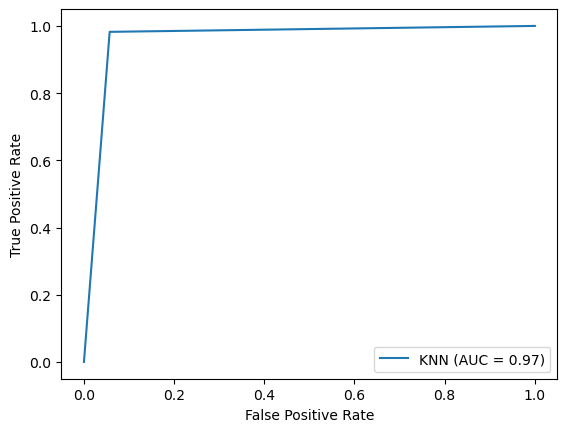

In [63]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y2_test,y_predKNN)
roc_displayKNN = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='KNN')
roc_displayKNN.plot()
plt.show()

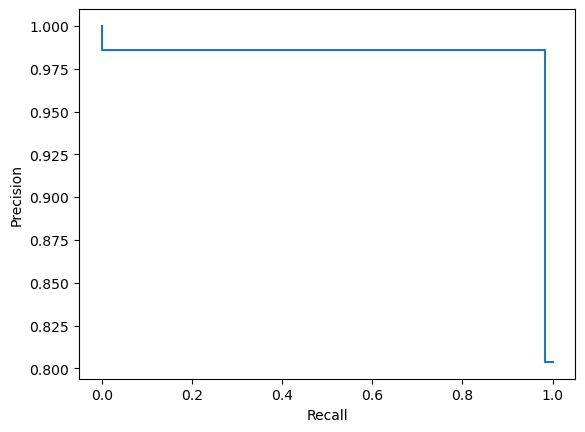

In [64]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y2_test, y_predKNN)
pr_displayKNN = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayKNN.plot()
plt.show()

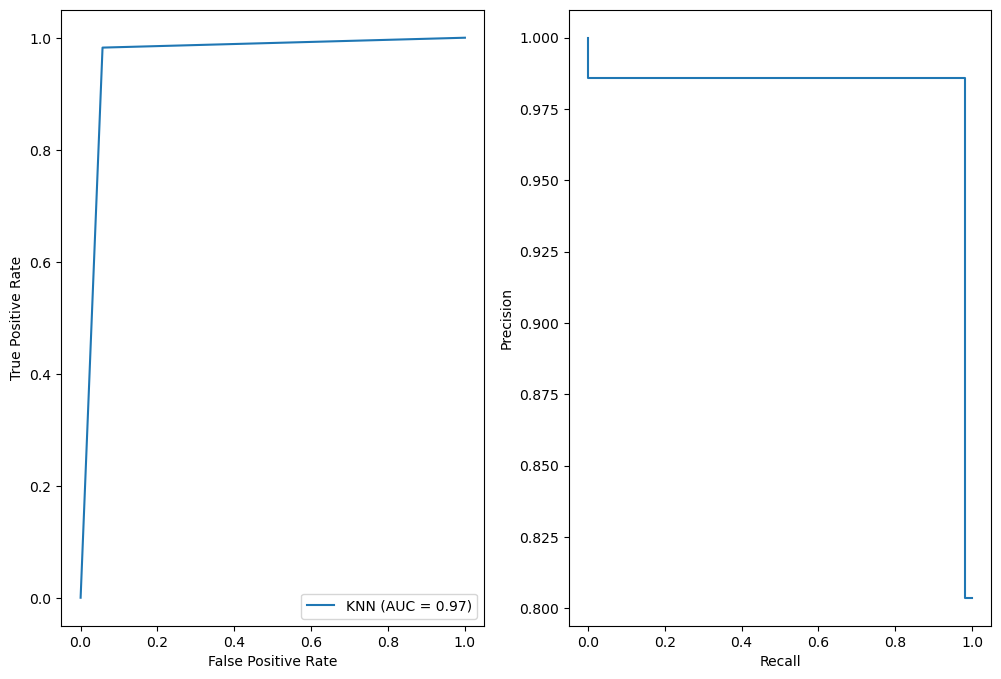

In [65]:
#See them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_displayKNN.plot(ax=ax1)
pr_displayKNN.plot(ax=ax2)
plt.show()

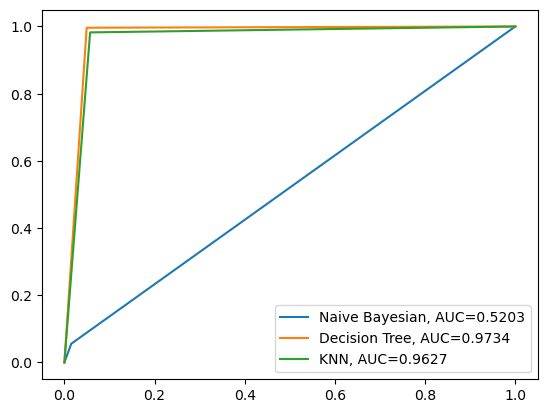

In [67]:
plt.figure()
fpr, tpr, _ = metrics.roc_curve(y_test, y_predNB)
auc = round(metrics.roc_auc_score(y_test, y_predNB), 4)
plt.plot(fpr,tpr,label="Naive Bayesian, AUC="+str(auc))
fpr, tpr, _ = metrics.roc_curve(y_test, y_predDT)
auc = round(metrics.roc_auc_score(y_test, y_predDT), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))
fpr, tpr, _ = metrics.roc_curve(y_test, y_predKNN)
auc = round(metrics.roc_auc_score(y_test, y_predKNN), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))
#add legend
plt.legend()
plt.show()

# FINAL DECISION: pg 18 questions
<p>1. For this data, the decision tree is doing the best in classifying goodware and malware. Bayesian classifies nearly all the malware as goodware as seen through its f-1 score, and has a 28% accuracy so it will not be considered at all. DT and KNN had much closer percentages overall. The f-1 scores for both malware and goodware in the DT is a few percentage points higher than KNN, this means that both the precision and recall of the DT is better than that of KNN. Also the specificity and sensitivity of DT is also a few percentage points highter than KNN. To add to it all, the DT has a 99% accuracy overall whereas KNN has ~95%. Because of all those factors, I believe that the Decision Tree does a much better job classifying the data than the other two classifiers. </p>
<p>2. In this data, none of the classifiers do better at one thing than another, it's either both or none. This makes sense since the DT is the best as classifying binary data, and since KNN is distance based and does worse with the more dimensions used (in this case 247), it will be much easier for the KNN classifier to misclassify some points. The Bayesian classifier is just doing something fully wrong and it could be due to the large amount of malware cases compared to goodware, but something is not working correctly in Bayesian with this dataset. </p>